In [1]:
import pandas as pd
import numpy as np

In [404]:
df = pd.read_excel('generalized_review_tokens_11_tagged_v3.xlsx',index_col=0)
df['Corrected'] =0
df.head()

,review no,restaurant,sentence no,words,algo_tag,Corrected
0,0,1441 Pizzeria,0,I,O,0
1,0,1441 Pizzeria,0,visited,O,0
2,0,1441 Pizzeria,0,the,O,0
3,0,1441 Pizzeria,0,Fort,O,0
4,0,1441 Pizzeria,0,outlet,O,0


In [409]:
class sentenceGetter(object):
    def __init__(self,df):
        self.data = df
        agg_func = lambda s: [ (w,t,r,rn) for w,t,r,rn in zip(s["words"].tolist(),s["algo_tag"].tolist(),s["restaurant"].tolist(),s["review no"].tolist())]
        self.grouped = self.data.groupby(["review no","sentence no"]).apply(agg_func)
        self.sentences = [sentence for sentence in self.grouped]

In [410]:
df.columns

Index(['review no', 'restaurant', 'sentence no', 'words', 'algo_tag',
       'Corrected'],
      dtype='object')

In [411]:
getter = sentenceGetter(df)
sentences = getter.sentences # get word,entity pair

In [412]:
print(sentences[:2])

[[('I', 'O', '1441 Pizzeria', 0), ('visited', 'O', '1441 Pizzeria', 0), ('the', 'O', '1441 Pizzeria', 0), ('Fort', 'O', '1441 Pizzeria', 0), ('outlet', 'O', '1441 Pizzeria', 0), ('and', 'O', '1441 Pizzeria', 0), ('I', 'O', '1441 Pizzeria', 0), ('wish', 'O', '1441 Pizzeria', 0), ('to', 'O', '1441 Pizzeria', 0), ('keep', 'O', '1441 Pizzeria', 0), ('visitinggg', 'O', '1441 Pizzeria', 0), ('..', 'O', '1441 Pizzeria', 0)], [('I', 'O', '1441 Pizzeria', 0), ('happened', 'O', '1441 Pizzeria', 0), ('to', 'O', '1441 Pizzeria', 0), ('walk', 'O', '1441 Pizzeria', 0), ('into', 'O', '1441 Pizzeria', 0), ('the', 'O', '1441 Pizzeria', 0), ('outlet', 'O', '1441 Pizzeria', 0), ('on', 'O', '1441 Pizzeria', 0), ('a', 'O', '1441 Pizzeria', 0), ('Wednesday', 'O', '1441 Pizzeria', 0), ('and', 'O', '1441 Pizzeria', 0), ('guess', 'O', '1441 Pizzeria', 0), ('what', 'O', '1441 Pizzeria', 0), ('!', 'O', '1441 Pizzeria', 0)]]


In [413]:
reviews = [[str(pair[0]) for pair in sentence] for sentence in sentences]
tags =  [[str(pair[1]) for pair in sentence] for sentence in sentences]
hotels = [list(set([str(pair[2]) for pair in sentence])) for sentence in sentences]
review_no = [list(set([str(pair[3]) for pair in sentence])) for sentence in sentences]

In [7]:
import nltk
from nltk import word_tokenize
from nltk import pos_tag

In [8]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [9]:
pos_ =  [pos_tag(review) for review in reviews] 
pos = [[str(pair[1]) for pair in sentence] for sentence in pos_] # get pos

In [10]:
print(reviews[3])
print(tags[3])
print(pos[3])

['I', 'chose', 'the', 'make', 'your', 'own', 'pizza', 'with', 'unlimited', 'toppings', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'E', 'O', 'O', 'E', 'O']
['PRP', 'VBD', 'DT', 'VB', 'PRP$', 'JJ', 'NN', 'IN', 'JJ', 'NNS', '.']


In [12]:
entity_tags =[] # get pos+E 
for i,sequence in enumerate(tags):
    entity_tag =[]
    for j,tag in enumerate(sequence):
        if tag=='E':
            entity_tag.append(sequence[j])
        else:
            entity_tag.append(pos[i][j])
    entity_tags.append(entity_tag)

In [13]:
print(reviews[3])
print(entity_tags[3])

['I', 'chose', 'the', 'make', 'your', 'own', 'pizza', 'with', 'unlimited', 'toppings', '.']
['PRP', 'VBD', 'DT', 'VB', 'PRP$', 'JJ', 'E', 'IN', 'JJ', 'E', '.']


In [209]:
# sequences=[] # get word,entity_pos
# for sentence,tagseq in zip(reviews,entity_tags):
#     sequence =[]
#     for word,tag in zip(sentence,tagseq):
#         sequence.append((word,tag))
#     sequences.append(sequence)

In [210]:
ids=[]
e_tags = []
e_reviews =[]
for i,(rev,seq) in enumerate(zip(reviews,entity_tags)):
    if 'E' in seq:
        e_reviews.append(rev)
        e_tags.append(seq)
        ids.append(i)

##### Test

In [264]:
nva = "PHRASE:{(<JJ|JJR|JJS|NN|NNS|NNP|NNPS>?<E>+<CC>)?<JJ|JJR|JJS|NN|NNS|NNP|NNPS>?<E>+<VB|VBP|VBN|VBD><RB>?<JJ|JJR|JJS|NN|NNS|NNP|NNPS>+}"
an = "PHRASE:{<RB>?<JJ|JJR|JJS><E>+}"

In [265]:
from nltk import RegexpParser
parser = RegexpParser(grammar=nva)

In [266]:
test =[('The','DT'),('Burger','E'),('and','CC'),('Pizza','E'),('was','VB'),('very','RB'),('good','JJ')]
test

[('The', 'DT'),
 ('Burger', 'E'),
 ('and', 'CC'),
 ('Pizza', 'E'),
 ('was', 'VB'),
 ('very', 'RB'),
 ('good', 'JJ')]

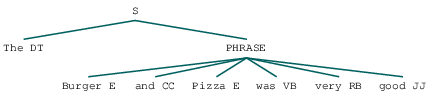

In [267]:
ress =parser.parse(test) ## Need ghostscript to draw tree
ress

In [268]:
print(ress)

(S The/DT (PHRASE Burger/E and/CC Pizza/E was/VB very/RB good/JJ))


#### Only E sents

In [284]:
print(len(sequences))
print(len(hotels))
print(len(reviews))
print(len(entity_tags))
print(len(e_reviews))
print(len(e_tags))

7172
7172
7172
7172
3618
3618


In [424]:
parser = RegexpParser(grammar=an) # choose grammar rule
results=[]
for x in sequences:
    results.append(parser.parse(x))
phrases =[]
c=0
for result in results:
    res =[]
    f=0
    for ele in result:
        #print(ele)
        if type(ele)==nltk.tree.Tree:
            #print(list(ele))
            sent= ' '.join([word[0] for word in list(ele)])
            res.append(sent)
            f=1
            c+=1
    if f==0:
        res.append('NULL')
    phrases.append(res)
phrases_an = np.array(phrases)

In [425]:
print("Total Phrases Found",c)

Total Phrases Found 818


In [283]:
print(len(results))

7172


In [271]:
print("Total Phrases Found",c)

Total Phrases Found 818


In [421]:
parser = RegexpParser(grammar=nva) # choose grammar rule
results=[]
for x in sequences:
    results.append(parser.parse(x))
phrases =[]
c=0
for result in results:
    res =[]
    f=0
    for ele in result:
        #print(ele)
        if type(ele)==nltk.tree.Tree:
            #print(list(ele))
            sent= ' '.join([word[0] for word in list(ele)])
            res.append(sent)
            f=1
            c+=1
    if f==0:
        res.append('NULL')
    phrases.append(res)
phrases_nva = np.array(phrases)

In [363]:
print("Total Phrases Found",c)

Total Phrases Found 224


In [396]:
def replace_null(text):
    #print(text[0])
    if text[0]=='NULL':
        return 0
    else: return text

In [434]:
df0 =  pd.DataFrame(review_no,columns=['review no'])
df1 = pd.DataFrame([' '.join(review) for review in reviews],columns=['reviews'])
df2 = pd.DataFrame(hotels,columns=['hotels'])
df3 = pd.DataFrame(phrases_nva,columns=['phrases_nva'])
df4 = pd.DataFrame(phrases_an,columns=['phrases_an'])
final = pd.concat([df0,df1,df2,df3,df4],axis=1)
print(final.shape)
final.head()
final['phrases_nva'] =final.phrases_nva.apply(replace_null)
final['phrases_an'] =final.phrases_an.apply(replace_null)

(7172, 5)


In [435]:
final.head()

,review no,reviews,hotels,phrases_nva,phrases_an
0,0,I visited the Fort outlet and I wish to keep v...,1441 Pizzeria,0,0
1,0,I happened to walk into the outlet on a Wednes...,1441 Pizzeria,0,0
2,0,We were delighted the the BOGO offer .,1441 Pizzeria,0,0
3,0,I chose the make your own pizza with unlimited...,1441 Pizzeria,0,"[own pizza, unlimited toppings]"
4,0,I literary turned into a kid making my pizza .,1441 Pizzeria,0,0


In [436]:
final[(final.phrases_nva!=0) | (final.phrases_an!=0)].shape

(967, 5)

In [437]:
final[(final.phrases_nva!=0) | (final.phrases_an!=0)].groupby('hotels').count()

,review no,reviews,phrases_nva,phrases_an
hotels,,,,
1441 Pizzeria,198,198,198,198
5 Spice,69,69,69,69
Aaswad,108,108,108,108
Amar Juice Centre,57,57,57,57
Cafe Mondegar,57,57,57,57
Delhi Darbar,100,100,100,100
Elco,72,72,72,72
Guru Kripa,91,91,91,91
Pop Tate's,53,53,53,53


In [441]:
final[((final.phrases_nva!=0) | (final.phrases_an!=0)) & (final.hotels=='Shalimar')]

,review no,reviews,hotels,phrases_nva,phrases_an
1884,201,"The gravy was thick made by tomato a , cashew ...",Shalimar,[gravy was thick],0
1888,201,"This naan was something else , It was round an...",Shalimar,[naan was something],0
1891,201,The presentation was really good and paneer wa...,Shalimar,[paneer was soft],0
1892,201,", Chilly masala was delicious . ENDPAD",Shalimar,[Chilly masala was delicious],0
1897,202,"Ordered my all time favourite Mutton Biryani ,...",Shalimar,0,[favourite Mutton Biryani]
1904,204,This place serves the best Paratha in SOBO and...,Shalimar,0,[best Paratha]
1912,205,Shalimar restaurant in Mumbai 's Bhendi bazaar...,Shalimar,0,[decades old food]
1915,205,On 6th July I was in the area and just checked...,Shalimar,0,[quick lunch]
1916,205,The service was good as usual staff was helpfu...,Shalimar,[food was excellent],0
1918,205,"Seekh kabab is its signature item , kadai impr...",Shalimar,[dal gosht was ok],0
